# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요  
쭉 실행시켜주시고, 데이터 스케일링 빈칸은 채워주세요!

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [4]:
np.unique(y)
# Label 0~9인거 같습니다!!

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [5]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [7]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

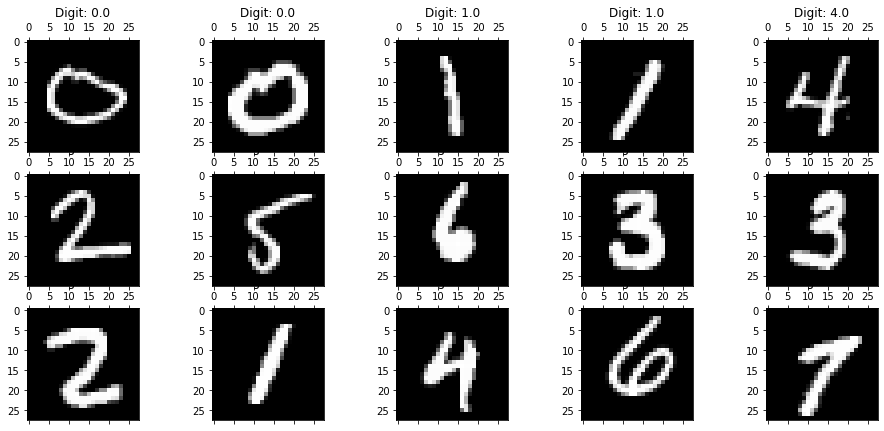

In [8]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) 스케일링 해주세요

In [9]:
# 이미지 데이터 스케일링 시, 타겟값은 음수를 포함하지 않아야 합니다!
# 왜곡이 생길 우려가 있는 스케일링도 지양해주세요
scaled_X = X / 255

### 2) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할해주세요

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.2)

In [11]:
print(f"shape of X_train : {X_train.shape}\nshape of X_test : {X_test.shape}\nshape of y_train : {y_train.shape}\nshape of y_test : {y_test.shape}\n")

shape of X_train : (56000, 784)
shape of X_test : (14000, 784)
shape of y_train : (56000, 1)
shape of y_test : (14000, 1)



### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 3) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주세요!<br>
scree plot을 직접 그려서 확인해주세요!

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_train)


주성분 개수를 정하는 방법은 크게 세가지 정도 있습니다.  
1. Scree plot을 그려 elbow point즉, 확실히 꺽이는 부분을 찾습니다.  
2. 주성분 분석은 스펙트럼 분해를 이용하여 진행되는데 이때 고유치는 분산을 의미합니다.  
즉, 고유치의 비율은 전체 데이터중의 남은 데이터의 설명비율이라고 볼 수 있습니다. 따라서 이를 70%~90%으로 맞춥니다.  
3. 2.과 비슷한데 고유치의 평균 이상인 것을 선택합니다. (잘 사용하지 않는거 같아 생략합니다.)

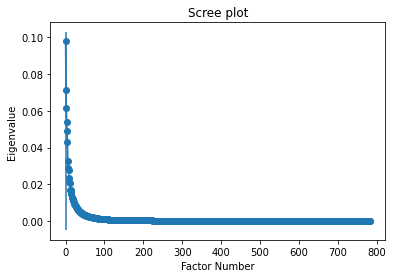

In [13]:
# Scree plot 이용

plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, marker = 'o')
plt.title("Scree plot")
plt.xlabel("Factor Number")
plt.ylabel("Eigenvalue")

from kneed import KneeLocator
kn = KneeLocator(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_ curve = 'convex', direction = 'decreasing')     # Elbow Point 찾기
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles = 'dashed', colors = 'r')     # Elbow Point를 수직선으로 표시

plt.show()

In [14]:
print("Elbow Point :", kn.knee) 

Elbow Point : 0


In [15]:
# 비율 이용
for i in [0.7, 0.8, 0.9]:
    pca = PCA(n_components = i, svd_solver = 'full')
    pca.fit_transform(X_train)
    print(f"{len(pca.explained_variance_)}개를 선택하면 {i*100}% 만큼 설명 가능")   

26개를 선택하면 0.7% 만큼 설명 가능


In [ ]:
# LDA 입니다.

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=8)
X_lda = lda.fit_transform(X_train, y_train.flatten())
sum = np.cumsum(lda.explained_variance_ratio_,axis = 0)   
sum

array([0.23792379, 0.44075279, 0.61847204, 0.72507615, 0.81897973,
       0.88791917, 0.93819486, 0.97276284])